In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score

from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image 
import seaborn as sns
import os
import re
import glob
import cv2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import preprocessing
import tqdm
from numpy import loadtxt
from sklearn.utils import class_weight

In [22]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

In [23]:
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap=plt.cm.Blues) #'viridis'
    #plt.savefig('/home/jovyan/img1.png')
    plt.show()
    
    return conf_matx

In [24]:
def plot_history(model_history, model_name):
    fig = plt.figure(figsize=(15,5), facecolor='w')
    ax = fig.add_subplot(121)
    ax.plot(model_history.history['loss'])
    ax.plot(model_history.history['val_loss'])
    ax.set(title=model_name + ': Model loss', ylabel='Loss', xlabel='Epoch')
    ax.legend(['Train', 'Val'], loc='upper left')
    ax = fig.add_subplot(122)
    ax.plot(model_history.history['accuracy'])
    ax.plot(model_history.history['val_accuracy'])
    ax.set(title=model_name + ': Model Accuracy; test='+ str(np.round(model_history.history['val_accuracy'][-1], 3)),
           ylabel='Accuracy', xlabel='Epoch')
    ax.legend(['Train', 'Val'], loc='upper left')
    #plt.savefig('/home/jovyan/img2.png')
    plt.show()
   
    
    return fig

In [25]:
def loadImages():

    feat_list = []
    

    for filename in sorted(glob.glob('/home/jovyan/DATA_MASTER_PROJECT/LSTM/Feature_LSTM_Train/*.npy'), key=natural_keys): 
        feat_list.append(np.load(filename))

    x_orig = np.reshape(feat_list, (len(feat_list),10, 64))
    
    path = '/home/jovyan/DATA_MASTER_PROJECT/LSTM/lstm_train.csv'     
    labels = pd.read_csv(path, usecols=["Type", "Category"],
                       sep="," )
    y_orig = np.array(labels['Category'])

    return x_orig, y_orig

In [26]:
x,y = loadImages()

In [27]:
x.shape, y.shape

((100, 10, 64), (100,))

In [28]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=999 )
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((80, 10, 64), (20, 10, 64), (80,), (20,))

In [29]:
weights = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)
print('weights = ' + str(weights))

weights = [2.96296296 0.54421769 1.21212121]


In [30]:
y_t = keras.utils.to_categorical(y_train)
y_v = keras.utils.to_categorical(y_val)

In [31]:
m = Sequential()
m.add(LSTM(10, input_shape = (x_train.shape[1],x_train.shape[2])))
m.add(Dense(3, activation='softmax'))

In [32]:
opt = keras.optimizers.Adam(lr=1e-3)

m.compile(loss= keras.losses.categorical_crossentropy, optimizer=opt, metrics = ['accuracy'])


In [33]:
epochs = 100

m4_h = m.fit(x_train,y_t,
                
                epochs=epochs,
                validation_data = (x_val,y_v), 
                
                class_weight = weights)

Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 2s 23ms/sample - loss: 1.2104 - accuracy: 0.2500 - val_loss: 1.1027 - val_accuracy: 0.3500
Epoch 2/100
80/80 [==============================] - 0s 377us/sample - loss: 1.0905 - accuracy: 0.3500 - val_loss: 0.9978 - val_accuracy: 0.5000
Epoch 3/100
80/80 [==============================] - 0s 365us/sample - loss: 0.9858 - accuracy: 0.4875 - val_loss: 0.9061 - val_accuracy: 0.6000
Epoch 4/100
80/80 [==============================] - 0s 359us/sample - loss: 0.9071 - accuracy: 0.5750 - val_loss: 0.8352 - val_accuracy: 0.7000
Epoch 5/100
80/80 [==============================] - 0s 356us/sample - loss: 0.8373 - accuracy: 0.6750 - val_loss: 0.7799 - val_accuracy: 0.8500
Epoch 6/100
80/80 [==============================] - 0s 361us/sample - loss: 0.7797 - accuracy: 0.7000 - val_loss: 0.7369 - val_accuracy: 0.8000
Epoch 7/100
80/80 [==============================] - 0s 332us/sample - loss: 0.7288 - a

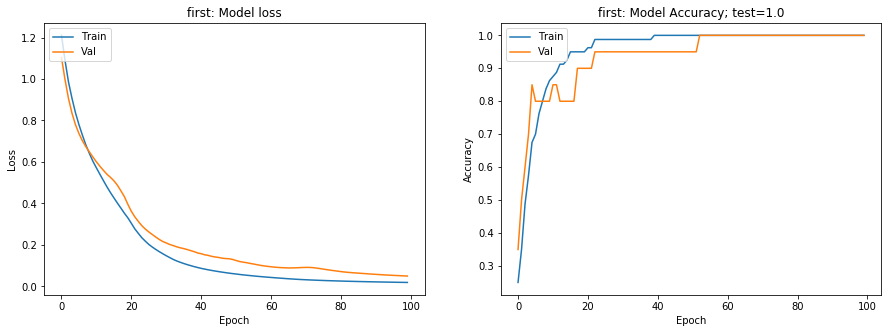

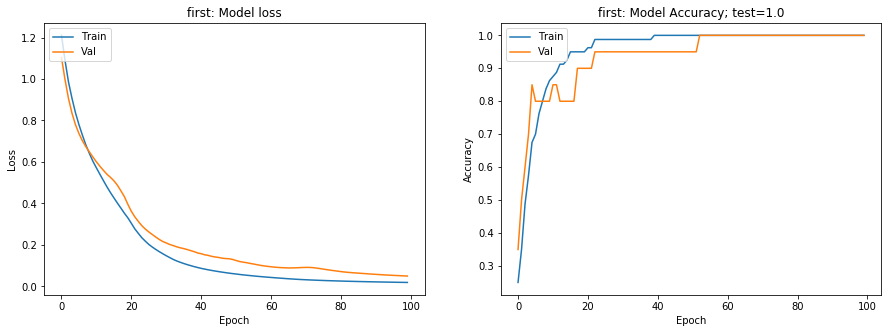

In [34]:
plot_history(m4_h, 'first')